In [22]:
import os
import cv2
import pandas as pd
import numpy as np
from skimage.filters import gaussian
from skimage.morphology import binary_closing, disk

# Read dataset images and corresponding labels from CSV file
dataset = pd.read_csv("/content/drive/MyDrive/lebels/BrEaST-Lesions-USG-clinical-data-Dec-15-2023.csv")  # Assuming "dataset_labels.csv" contains image filenames and labels
image_filenames = dataset["Image_filename"].tolist()  # Assuming "image_path" is the correct column name
labels = dataset["Classification"].tolist()

# Specify the directory where your images are stored
dataset_dir = "/content/drive/MyDrive/cancerdata"  # Replace "path/to/dataset" with the actual path to your dataset directory


In [27]:
import os
import numpy as np
import pandas as pd
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model

# Define the path to your dataset directory and CSV file
dataset_dir = "/content/drive/MyDrive/cancerdata"  # Update with your dataset directory
csv_file = "/content/drive/MyDrive/lebels/BrEaST-Lesions-USG-clinical-data-Dec-15-2023.csv"  # Update with the path to your CSV file

# Load labels from the CSV file into a DataFrame
labels_df = pd.read_csv(csv_file)

# Load pre-trained VGG16 model (excluding the top classification layer)
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Create a new model by removing the last layer from the VGG16 model
feature_extractor = Model(inputs=vgg16.input, outputs=vgg16.get_layer('block5_pool').output)

# Function to extract features from images
def extract_features(image_path, model, target_size=(224, 224)):
    img = image.load_img(image_path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    return features.flatten()

# List to store extracted features and corresponding labels
X_features = []
y_labels = []

# Iterate through the dataset directory and extract features
for index, row in labels_df.iterrows():
    filename = row['Image_filename']
    label = row['Classification']
    image_path = os.path.join(dataset_dir, filename)
    features = extract_features(image_path, feature_extractor)
    X_features.append(features)
    y_labels.append(label)

# Convert lists to NumPy arrays
X_features = np.array(X_features)
y_labels = np.array(y_labels)

# Display the shapes of the feature matrix and labels
print("Shape of X_features:", X_features.shape)
print("Shape of y_labels:", y_labels.shape)


1/1 [==============================] - 1s 505ms/step
Shape of X_features: (256, 25088)
Shape of y_labels: (256,)


In [31]:
y_labels

array(['benign', 'benign', 'benign', 'benign', 'malignant', 'benign',
       'malignant', 'malignant', 'benign', 'malignant', 'malignant',
       'malignant', 'malignant', 'benign', 'benign', 'benign', 'benign',
       'benign', 'benign', 'benign', 'benign', 'benign', 'benign',
       'benign', 'benign', 'malignant', 'malignant', 'benign', 'benign',
       'benign', 'benign', 'malignant', 'benign', 'malignant',
       'malignant', 'benign', 'benign', 'benign', 'benign', 'benign',
       'benign', 'benign', 'benign', 'benign', 'normal', 'malignant',
       'benign', 'benign', 'benign', 'malignant', 'benign', 'benign',
       'malignant', 'benign', 'malignant', 'benign', 'benign',
       'malignant', 'benign', 'malignant', 'normal', 'benign',
       'malignant', 'benign', 'benign', 'malignant', 'malignant',
       'benign', 'benign', 'benign', 'benign', 'malignant', 'benign',
       'benign', 'malignant', 'malignant', 'benign', 'benign',
       'malignant', 'benign', 'benign', 'malignant

In [37]:
# Define the mapping dictionary
label_mapping = {'benign': 0, 'malignant': 1, 'normal': 2}

# Map the labels to binary values
y_labels_binary = [label_mapping[label] for label in y_labels]

# Now, y_labels_binary contains the binary labels (0 for 'benign', 1 for 'malignant', and 2 for 'normal')


In [39]:
y_labels_binary

[0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 2,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 2,
 0,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,


In [57]:
from sklearn.feature_selection import SelectKBest, f_classif

# Assuming X_features is your feature matrix and y_labels_binary is your binary labels

# Select the top 100 features based on ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=100)
X_selected = selector.fit_transform(X_features, y_labels_binary)

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Print the indices of the selected features
print("Selected feature indices:", selected_indices)


Selected feature indices: [  245   257   311   329   422   471   769  3591  3623  3647  3655  3658
  3736  3743  3764  3781  3829  3841  3862  3864  3866  3870  3872  3895
  3896  3952  4002  4006  4030  4139  4147  4159  4167  4216  4276  4376
  4378  4382  4431  4545  4671  4805  7173  7258  7278  7298  7320  7322
  7356  7391  7409  7425  7438  7446  7546  7657  7685  7776  7860  8015
  9983 10485 10658 10757 10773 10842 10915 10923 11244 12843 13355 13383
 13569 13582 14778 14828 15290 15345 15626 18167 18172 18173 18188 18251
 18462 18490 18582 18679 18684 18763 18861 19058 19301 19373 19423 21509
 22166 22527 22548 22678]


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [    0     7    10 ... 25058 25063 25068] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [59]:
print("Shape of X_selected:", X_selected.shape)


Shape of X_selected: (256, 100)


In [60]:
import numpy as np

X_selected_reshaped = np.expand_dims(X_selected, axis=1)
print("Shape of X_selected_reshaped:", X_selected_reshaped.shape)


Shape of X_selected_reshaped: (256, 1, 100)


In [70]:
import numpy as np

# Convert y_labels_binary to a NumPy array
y_labels_binary_np = np.array(y_labels_binary)

# Print the shape of X_features
print("Shape of X_features:", X_features.shape)

# Print the shape of y_labels_binary_np
print("Shape of y_labels_binary:", y_labels_binary_np.shape)


Shape of X_features: (256, 25088)
Shape of y_labels_binary: (256,)


In [74]:
import numpy as np

# Convert lists to NumPy arrays
y_train = np.array(y_train)
y_val = np.array(y_val)

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print('Validation Loss:', loss)
print('Validation Accuracy:', accuracy)


Epoch 1/10
7/7 [==============================] - 3s 204ms/step - loss: 0.7278 - accuracy: 0.5882 - val_loss: 0.6089 - val_accuracy: 0.6731
Epoch 2/10
7/7 [==============================] - 1s 143ms/step - loss: 0.6117 - accuracy: 0.6127 - val_loss: 0.6069 - val_accuracy: 0.6731
Epoch 3/10
7/7 [==============================] - 1s 215ms/step - loss: 0.5448 - accuracy: 0.7206 - val_loss: 0.5999 - val_accuracy: 0.7500
Epoch 4/10
7/7 [==============================] - 1s 170ms/step - loss: 0.5091 - accuracy: 0.8333 - val_loss: 0.5905 - val_accuracy: 0.7692
Epoch 5/10
7/7 [==============================] - 1s 138ms/step - loss: 0.4820 - accuracy: 0.8529 - val_loss: 0.5760 - val_accuracy: 0.7308
Epoch 6/10
7/7 [==============================] - 1s 139ms/step - loss: 0.4482 - accuracy: 0.8382 - val_loss: 0.5816 - val_accuracy: 0.6731
Epoch 7/10
7/7 [==============================] - 1s 145ms/step - loss: 0.4011 - accuracy: 0.9020 - val_loss: 0.5907 - val_accuracy: 0.7308
Epoch 8/10
7/7 [====

In [76]:
# Reshape the input data to 2D
X_train_2d = X_train.reshape(X_train.shape[0], -1)
X_val_2d = X_val.reshape(X_val.shape[0], -1)

# Initialize SVM classifier
svm_model = SVC(kernel='linear', random_state=42)

# Train the SVM model
svm_model.fit(X_train_2d, y_train)

# Make predictions on the validation set
y_pred = svm_model.predict(X_val_2d)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_val, y_pred))


Accuracy: 0.7692307692307693
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84        35
           1       0.69      0.56      0.62        16
           2       0.00      0.00      0.00         1

    accuracy                           0.77        52
   macro avg       0.50      0.48      0.49        52
weighted avg       0.75      0.77      0.75        52



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


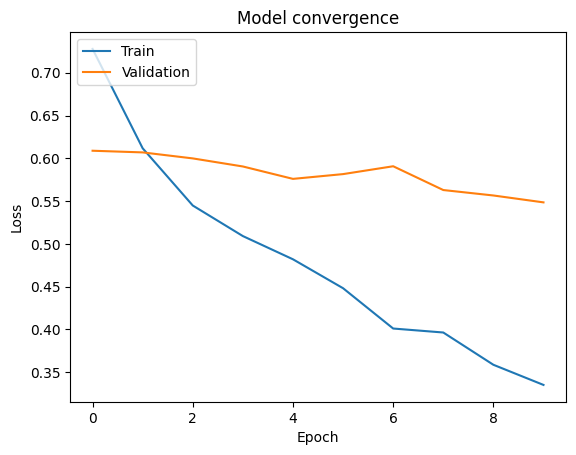

In [77]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model convergence')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [79]:
# Reshape the input data to have a dimensionality of 2
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_val_reshaped = X_val.reshape(X_val.shape[0], -1)

# Create SVM model with cubic kernel
svm_model = SVC(kernel='poly', degree=3)

# Train the SVM model
svm_model.fit(X_train_reshaped, y_train)

# Make predictions on the validation set
y_pred_svm = svm_model.predict(X_val_reshaped)

# Calculate accuracy
accuracy_svm = accuracy_score(y_val, y_pred_svm)
print("Accuracy of SVM model with cubic kernel:", accuracy_svm)


Accuracy of SVM model with cubic kernel: 0.6730769230769231


In [81]:
# Train the LSTM model
history_lstm = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/10
7/7 [==============================] - 1s 158ms/step - loss: 0.3141 - accuracy: 0.8971 - val_loss: 0.5507 - val_accuracy: 0.7115
Epoch 2/10
7/7 [==============================] - 1s 144ms/step - loss: 0.2969 - accuracy: 0.9020 - val_loss: 0.5319 - val_accuracy: 0.7308
Epoch 3/10
7/7 [==============================] - 1s 142ms/step - loss: 0.2715 - accuracy: 0.9118 - val_loss: 0.5526 - val_accuracy: 0.7115
Epoch 4/10
7/7 [==============================] - 1s 144ms/step - loss: 0.2562 - accuracy: 0.9167 - val_loss: 0.5604 - val_accuracy: 0.7500
Epoch 5/10
7/7 [==============================] - 1s 165ms/step - loss: 0.2477 - accuracy: 0.9118 - val_loss: 0.5449 - val_accuracy: 0.7308
Epoch 6/10
7/7 [==============================] - 1s 202ms/step - loss: 0.2360 - accuracy: 0.9216 - val_loss: 0.5509 - val_accuracy: 0.7115
Epoch 7/10
7/7 [==============================] - 2s 241ms/step - loss: 0.2257 - accuracy: 0.9167 - val_loss: 0.5639 - val_accuracy: 0.6923
Epoch 8/10
7/7 [====

Validation Accuracy (SVM - Cubic Kernel): 0.6730769230769231


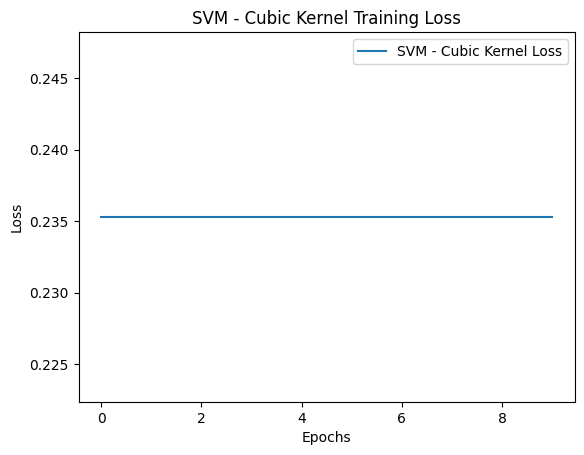

In [86]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Define the number of epochs
epochs = 10

# Create an SVM model with cubic kernel
svm_model_cubic = SVC(kernel='poly', degree=3, random_state=42)

# Train the SVM model with cubic kernel
history_svm_cubic = []
for epoch in range(epochs):
    svm_model_cubic.fit(X_train_flat, y_train)
    # Calculate training loss (SVM doesn't directly provide loss, so we use accuracy as a proxy)
    y_pred_train = svm_model_cubic.predict(X_train_flat)
    train_loss = 1.0 - accuracy_score(y_train, y_pred_train)
    history_svm_cubic.append(train_loss)

# Predict on the validation set
y_pred_val_svm_cubic = svm_model_cubic.predict(X_val_flat)

# Calculate accuracy on validation set
accuracy_val_svm_cubic = accuracy_score(y_val, y_pred_val_svm_cubic)

print("Validation Accuracy (SVM - Cubic Kernel):", accuracy_val_svm_cubic)

# Plot convergence history
plt.plot(history_svm_cubic, label='SVM - Cubic Kernel Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('SVM - Cubic Kernel Training Loss')
plt.legend()
plt.show()


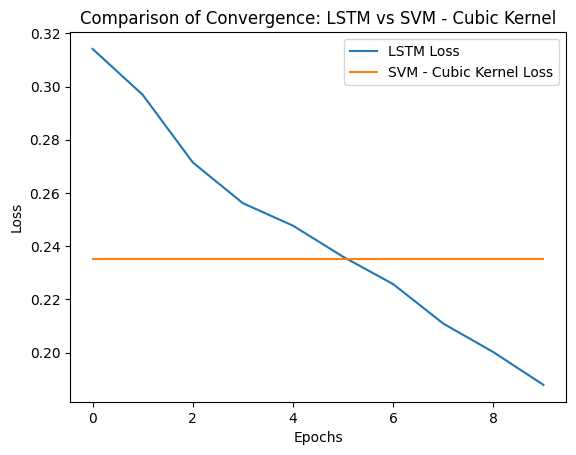

In [87]:
import matplotlib.pyplot as plt

# Plot convergence history
plt.plot(history_lstm.history['loss'], label='LSTM Loss')
plt.plot(history_svm_cubic, label='SVM - Cubic Kernel Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Comparison of Convergence: LSTM vs SVM - Cubic Kernel')
plt.legend()
plt.show()
